In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model(all corp landmarks)
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image.flags.writeable = False                  
    results = model.process(image)                 
    image.flags.writeable = True                   
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
    return image, results

In [4]:
def draw_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [18]:
# testing opencv and mediapipe
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()

        image, results = mediapipe_detection(frame, holistic)
        
        draw_landmarks(image, results)

        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [19]:
draw_landmarks(frame, results)

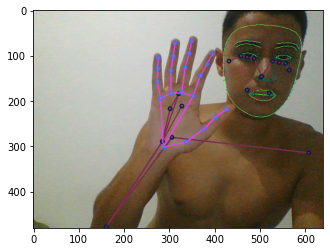

In [21]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))


In [22]:
len(results.pose_landmarks.landmark) * 4

132

In [23]:
# retriving the data from the mediapipe results
# if there is no hands the results.left_hand_landmarks or results.right_hand_landmarks variable will be null 
# so we replace it by an array with the same length of  zeros
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
left = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
right = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [24]:
left

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
right

array([ 4.49760050e-01,  6.27902269e-01, -9.60838370e-05,  5.28287590e-01,
        6.05887830e-01, -9.54734441e-03,  5.89653552e-01,  5.44909596e-01,
       -1.78768914e-02,  6.30387127e-01,  4.91078436e-01, -3.75063643e-02,
        6.68103218e-01,  4.55568731e-01, -6.42827824e-02,  5.52444816e-01,
        3.94098401e-01,  2.90548503e-02,  5.77851415e-01,  3.01602781e-01,
        1.36387693e-02,  6.00486398e-01,  2.47778177e-01, -4.28528944e-03,
        6.20308936e-01,  2.01215550e-01, -1.78148076e-02,  5.13658702e-01,
        3.77627224e-01,  8.79240315e-03,  5.24985373e-01,  2.66346395e-01,
       -2.63500959e-03,  5.38248658e-01,  1.99002519e-01, -2.07809396e-02,
        5.47837496e-01,  1.40653968e-01, -3.50268260e-02,  4.76343572e-01,
        3.82075936e-01, -1.91374440e-02,  4.76054519e-01,  2.77952075e-01,
       -3.49267796e-02,  4.83621359e-01,  2.10701391e-01, -5.30019403e-02,
        4.89405036e-01,  1.50484085e-01, -6.80738389e-02,  4.39472437e-01,
        4.06168312e-01, -

In [26]:
# concatenate all landmarks in one flattened array
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh])

In [27]:
test = extract_keypoints(results)
test

array([ 7.88293898e-01,  3.05602700e-01, -1.00841701e+00,  9.99282539e-01,
        8.25995624e-01,  2.35402033e-01, -9.34192359e-01,  9.99007881e-01,
        8.48975539e-01,  2.39835188e-01, -9.34397995e-01,  9.98863041e-01,
        8.70341480e-01,  2.44163588e-01, -9.34239686e-01,  9.98620391e-01,
        7.62746453e-01,  2.21653834e-01, -9.20128226e-01,  9.99270916e-01,
        7.38952875e-01,  2.16293827e-01, -9.20025468e-01,  9.99413848e-01,
        7.16422439e-01,  2.10965261e-01, -9.20135677e-01,  9.99511898e-01,
        8.83220196e-01,  2.75268495e-01, -4.59875733e-01,  9.98740792e-01,
        6.76483870e-01,  2.34434322e-01, -3.96653354e-01,  9.99506772e-01,
        8.14949512e-01,  3.79752666e-01, -8.23561549e-01,  9.99610543e-01,
        7.38288283e-01,  3.66721183e-01, -8.05792630e-01,  9.99660611e-01,
        9.51410294e-01,  6.55031383e-01, -1.93874091e-01,  9.97141659e-01,
        4.78593647e-01,  5.83973944e-01, -2.83715576e-01,  9.99610841e-01,
        9.63714242e-01,  

In [28]:
len(test)

258

In [34]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks','please', 'iloveyou', 'yes', 'no', 'good'])

# 45 sequence for each action  
no_sequences = 45

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 1

In [32]:
# folder setup
for action in actions: 
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [35]:

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # Loop through actions
    for action in actions:
        # Loop through sequences or videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read frame
                ret, frame = cap.read()

                # Make detections using the function defined above
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks using the function defined above
                draw_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                #define path to wher save the numpy array
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [36]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [37]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'hello': 0,
 'thanks': 1,
 'please': 2,
 'iloveyou': 3,
 'yes': 4,
 'no': 5,
 'good': 6}

In [38]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [41]:
len(sequences[0])

30

In [42]:
actions[labels[0]]

'hello'

In [43]:
np.array(sequences).shape

(315, 30, 258)

In [44]:
np.array(labels).shape

(315,)

In [45]:
X = np.array(sequences)
y = to_categorical(labels).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [48]:
y_train[:5]

array([[0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0]])

In [49]:
y_train.shape

(283, 7)

In [50]:
X_train.shape

(283, 30, 258)

In [51]:
len(actions)

7

In [70]:
# build lstm model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [88]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 258)))
model.add(LSTM(32, return_sequences=True, activation='relu'))
model.add(LSTM(128, return_sequences=False, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(actions), activation='softmax'))

In [89]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [90]:
model.fit(X_train, y_train, epochs=300)

Epoch 1/300
9/9 [==============================] - 0s 49ms/step - loss: 1.9518 - categorical_accuracy: 0.1519
Epoch 2/300
9/9 [==============================] - 0s 51ms/step - loss: 1.9150 - categorical_accuracy: 0.2191
Epoch 3/300
9/9 [==============================] - 0s 48ms/step - loss: 1.8637 - categorical_accuracy: 0.1731
Epoch 4/300
9/9 [==============================] - 0s 52ms/step - loss: 1.6832 - categorical_accuracy: 0.2862
Epoch 5/300
9/9 [==============================] - 0s 52ms/step - loss: 1.6423 - categorical_accuracy: 0.3675 0s - loss: 1.6423 - categorical_accuracy: 0.36
Epoch 6/300
9/9 [==============================] - 1s 78ms/step - loss: 1.4318 - categorical_accuracy: 0.3781
Epoch 7/300
9/9 [==============================] - 1s 79ms/step - loss: 1.1716 - categorical_accuracy: 0.5159
Epoch 8/300
9/9 [==============================] - 0s 52ms/step - loss: 0.9428 - categorical_accuracy: 0.5512
Epoch 9/300
9/9 [==============================] - 0s 51ms/step - loss: 0

9/9 [==============================] - 1s 62ms/step - loss: 0.2978 - categorical_accuracy: 0.8622
Epoch 73/300
9/9 [==============================] - 1s 67ms/step - loss: 0.2930 - categorical_accuracy: 0.8799
Epoch 74/300
9/9 [==============================] - 1s 71ms/step - loss: 0.2712 - categorical_accuracy: 0.8693
Epoch 75/300
9/9 [==============================] - 1s 61ms/step - loss: 0.2376 - categorical_accuracy: 0.9046
Epoch 76/300
9/9 [==============================] - 1s 58ms/step - loss: 0.2387 - categorical_accuracy: 0.9011 0s - loss: 0.2231 - categorical_ac
Epoch 77/300
9/9 [==============================] - 0s 51ms/step - loss: 0.2172 - categorical_accuracy: 0.9011
Epoch 78/300
9/9 [==============================] - 1s 58ms/step - loss: 0.2250 - categorical_accuracy: 0.9117
Epoch 79/300
9/9 [==============================] - 1s 65ms/step - loss: 0.2180 - categorical_accuracy: 0.9046
Epoch 80/300
9/9 [==============================] - 0s 51ms/step - loss: 0.1936 - categori

9/9 [==============================] - 0s 44ms/step - loss: 0.1949 - categorical_accuracy: 0.9329
Epoch 144/300
9/9 [==============================] - 0s 45ms/step - loss: 0.3471 - categorical_accuracy: 0.8622
Epoch 145/300
9/9 [==============================] - 0s 53ms/step - loss: 0.2162 - categorical_accuracy: 0.9046
Epoch 146/300
9/9 [==============================] - 0s 54ms/step - loss: 0.1949 - categorical_accuracy: 0.9293
Epoch 147/300
9/9 [==============================] - 0s 52ms/step - loss: 0.1997 - categorical_accuracy: 0.9329
Epoch 148/300
9/9 [==============================] - 0s 43ms/step - loss: 0.1770 - categorical_accuracy: 0.9293
Epoch 149/300
9/9 [==============================] - 0s 45ms/step - loss: 0.1652 - categorical_accuracy: 0.9293
Epoch 150/300
9/9 [==============================] - 0s 45ms/step - loss: 0.1707 - categorical_accuracy: 0.9399
Epoch 151/300
9/9 [==============================] - 0s 46ms/step - loss: 0.2744 - categorical_accuracy: 0.8799
Epoch 

9/9 [==============================] - 0s 42ms/step - loss: 0.1421 - categorical_accuracy: 0.9399
Epoch 216/300
9/9 [==============================] - 0s 46ms/step - loss: 0.1068 - categorical_accuracy: 0.9647
Epoch 217/300
9/9 [==============================] - 1s 64ms/step - loss: 0.0779 - categorical_accuracy: 0.9823
Epoch 218/300
9/9 [==============================] - 1s 58ms/step - loss: 0.0832 - categorical_accuracy: 0.9647
Epoch 219/300
9/9 [==============================] - 0s 55ms/step - loss: 0.0894 - categorical_accuracy: 0.9682
Epoch 220/300
9/9 [==============================] - 0s 45ms/step - loss: 0.3208 - categorical_accuracy: 0.9505
Epoch 221/300
9/9 [==============================] - 0s 48ms/step - loss: 0.5367 - categorical_accuracy: 0.8657
Epoch 222/300
9/9 [==============================] - 0s 51ms/step - loss: 0.3621 - categorical_accuracy: 0.8622
Epoch 223/300
9/9 [==============================] - 0s 49ms/step - loss: 0.2902 - categorical_accuracy: 0.8693 0s - l

9/9 [==============================] - 0s 48ms/step - loss: 0.0279 - categorical_accuracy: 0.9929
Epoch 287/300
9/9 [==============================] - 1s 58ms/step - loss: 0.0299 - categorical_accuracy: 0.9929
Epoch 288/300
9/9 [==============================] - 0s 46ms/step - loss: 0.0195 - categorical_accuracy: 0.9965
Epoch 289/300
9/9 [==============================] - 0s 49ms/step - loss: 0.0666 - categorical_accuracy: 0.9717
Epoch 290/300
9/9 [==============================] - 1s 61ms/step - loss: 0.1385 - categorical_accuracy: 0.9682
Epoch 291/300
9/9 [==============================] - 1s 64ms/step - loss: 0.0593 - categorical_accuracy: 0.9788
Epoch 292/300
9/9 [==============================] - 1s 61ms/step - loss: 0.0555 - categorical_accuracy: 0.9823
Epoch 293/300
9/9 [==============================] - 0s 51ms/step - loss: 0.1477 - categorical_accuracy: 0.9576
Epoch 294/300
9/9 [==============================] - 0s 46ms/step - loss: 1.1421 - categorical_accuracy: 0.7527
Epoch 

In [91]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 0s/step - loss: 0.0758 - categorical_accuracy: 0.9688


[0.07581039518117905, 0.96875]

In [92]:
model.save("./96.h5")
model.save_weights("./96.weights.h5")

In [93]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.85

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        
        # Draw landmarks
        draw_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
#             image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()